<a href="https://colab.research.google.com/github/IsidroJ/Colab_Archivos_Clase_PADP/blob/main/Practica_28_ReduccionNumerosidad_IJGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ==========================================================================
# 📝 Tarea: Reducción de la Numerosidad con CNN, ENN y K-medias usando SVM
# 📊 Dataset: Breast Cancer (Scikit-Learn)
# 👤 Autor/a: [Nombre del estudiante]
# 📅 Fecha: [dd/mm/aaaa]
# ==========================================================================

## 🔍 Descripción:
En este cuaderno aplicarás técnicas de reducción de la numerosidad (CNN, ENN, K-medias) al conjunto de datos Breast Cancer y analizarás su efecto en el rendimiento de un modelo SVM.

## ==========================================================================

## 1. Cargar librerías necesarias
Escribe aquí la importación de librerías: numpy, pandas, matplotlib, seaborn, sklearn (datasets, model_selection, preprocessing, metrics, svm, kmeans), etc.

En el caso de los códigos de ENN, CNN, estos  deberás tomarlos del cuaderno que contiene la teoría y ejemplos.

In [72]:
#1. Cargar librerías necesarias

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles


from sklearn.utils.validation import check_X_y
from sklearn.neighbors import KNeighborsClassifier
import random

from sklearn.datasets import make_classification

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.utils.validation import check_X_y


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# --------------------------------------------------------------------------

## 2. Cargar y explorar el conjunto de datos Breast Cancer
- Cargar el dataset con sklearn.datasets.load_breast_cancer
- Explora las dimensiones, variables, y distribución de clases

In [73]:
#2. Cargar y explorar el conjunto de datos Breast Cancer


from sklearn.datasets import load_breast_cancer
import pandas as pd
from IPython.display import display, HTML

data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# Crear DataFrame SOLO con las características
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = y

# Primeras filas del dataset
display(HTML("<h3 style='color:blue; font-size:18px;'> Primeras 5 filas del dataset: </h3>"))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [74]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Tamño del conjunto de datos: cantidad de filas y columnas </h3>"))
print(df.shape)

(569, 31)


In [75]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Información del conjunto de datos </h3>"))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [76]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Descripción estadística: </h3>"))
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


target
1    357
0    212
Name: count, dtype: int64


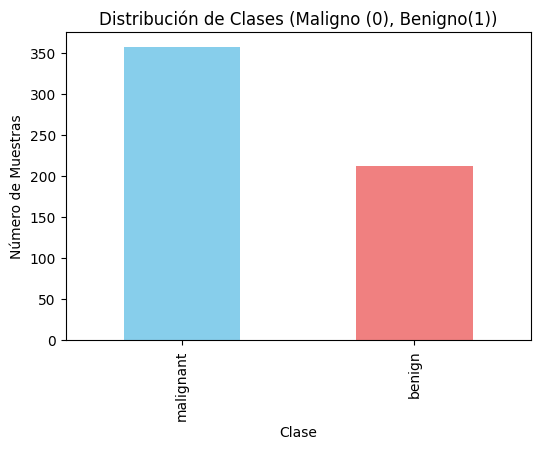

In [77]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Distribución de clases: </h3>"))
print(df['target'].value_counts())

plt.figure(figsize=(6, 4))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución de Clases (Maligno (0), Benigno(1))')
plt.xlabel('Clase')
plt.ylabel('Número de Muestras')
plt.xticks(ticks=[0, 1], labels=target_names)
plt.show()

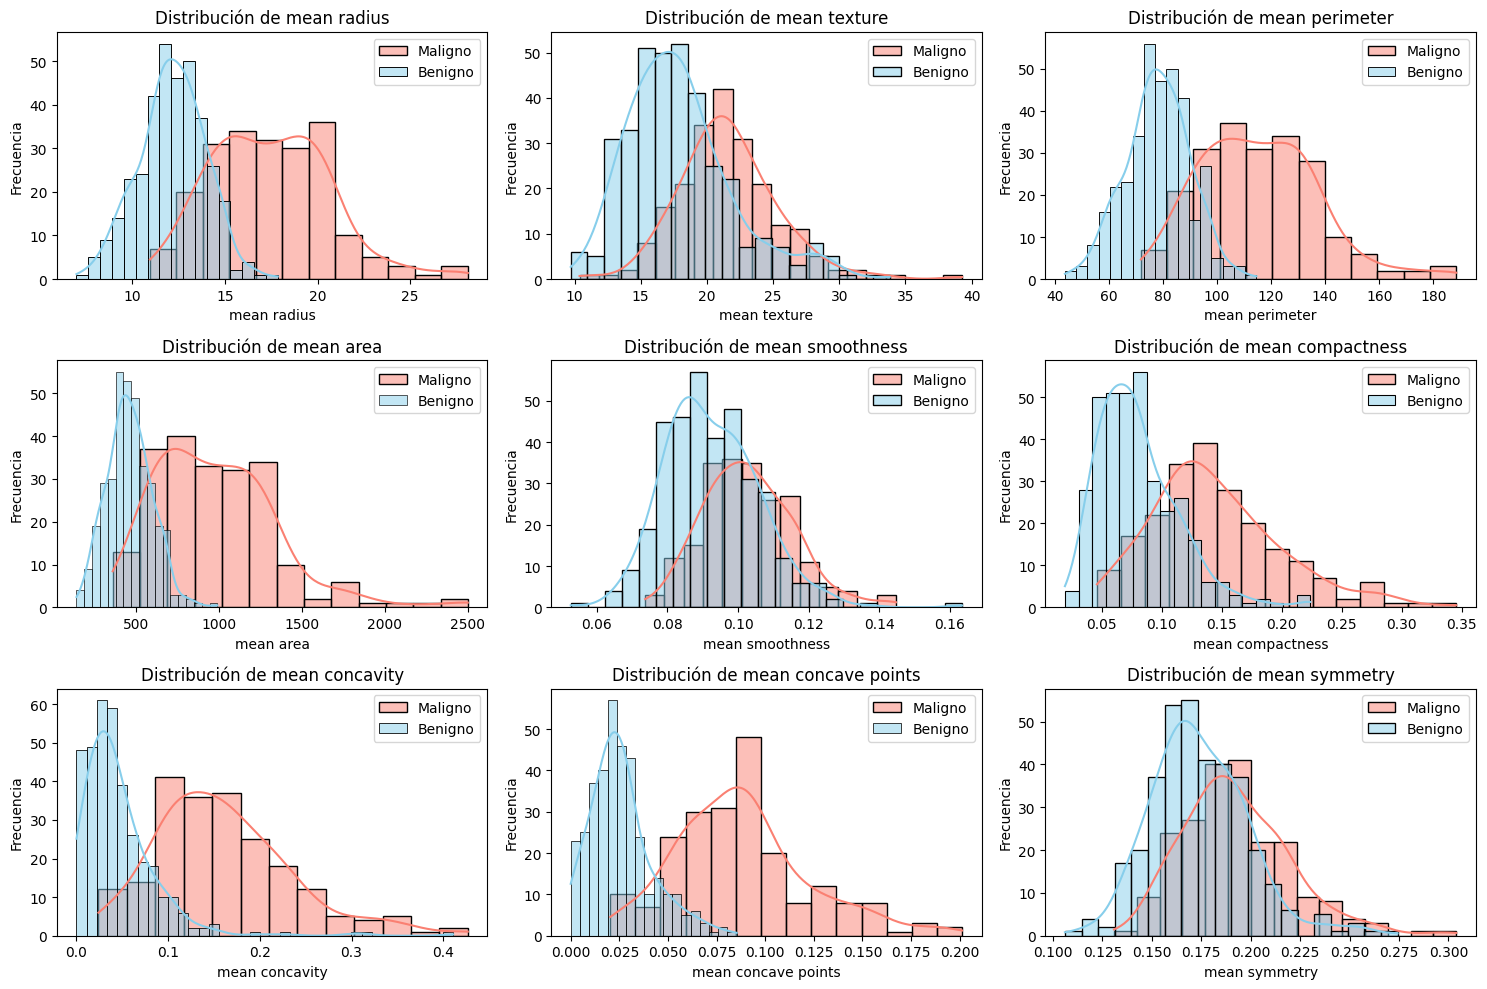

In [78]:
import seaborn as sns
display(HTML("<h3 style='color:blue; font-size:18px;'> Distribución de las principales características: </h3>"))
print('\n')

selected_features = [ 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 3, i + 1) # 2 rows, 3 columns
    sns.histplot(df[df['target'] == 0][feature], color='salmon', label='Maligno', kde=True)
    sns.histplot(df[df['target'] == 1][feature], color='skyblue', label='Benigno', kde=True)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend()

plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------

## 3. Preprocesamiento
 - Escalamiento de características (StandardScaler)
 - División del conjunto en entrenamiento y prueba
 - usar hold-out de 70% y 30%

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

display(HTML("<h3 style='color:blue; font-size:18px;'> División del conjunto en entrenamiento y prueba: </h3>"))

# 3. Preprocesamiento

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Tamaño conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño conjunto de prueba:", X_test.shape, y_test.shape)

Tamaño conjunto de entrenamiento: (398, 30) (398,)
Tamaño conjunto de prueba: (171, 30) (171,)


In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------------------------------------------

## 4. Aplicar técnica CNN (Condensed Nearest Neighbor)

- Aplicar CNN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido


In [81]:
#4. Aplicar técnica CNN (Condensed Nearest Neighbor)


from sklearn.utils.validation import check_X_y
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import random

class CNN:


    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def select_data(self, X, y):
        # Validación de entrada: datos densos
        X, y = check_X_y(X, y, accept_sparse=False)

        idx_s = []  # índice de instancias seleccionadas
        classes = np.unique(y)
        self.classes_ = classes

        # Iniciar con una instancia aleatoria por clase
        for cur_class in classes:
            mask = np.where(y == cur_class)[0]
            choose_id = random.choice(mask)
            idx_s.append(choose_id)

        # Revisión aleatoria del resto de las instancias
        train_idx = list(range(len(y)))
        random.shuffle(train_idx)

        flag = True
        while flag:
            flag = False
            self.classifier.fit(X[idx_s], y[idx_s])
            for idx in train_idx:
                if idx not in idx_s:
                    x_i = X[idx].reshape(1, -1)
                    if self.classifier.predict(x_i) != [y[idx]]:
                        idx_s.append(idx)
                        self.classifier.fit(X[idx_s], y[idx_s])
                        flag = True

        self.X_ = X[idx_s]
        self.y_ = y[idx_s]
        self.sample_indices_ = sorted(idx_s)
        self.reduction_ = 1.0 - len(self.y_) / len(y)
        return self.X_, self.y_


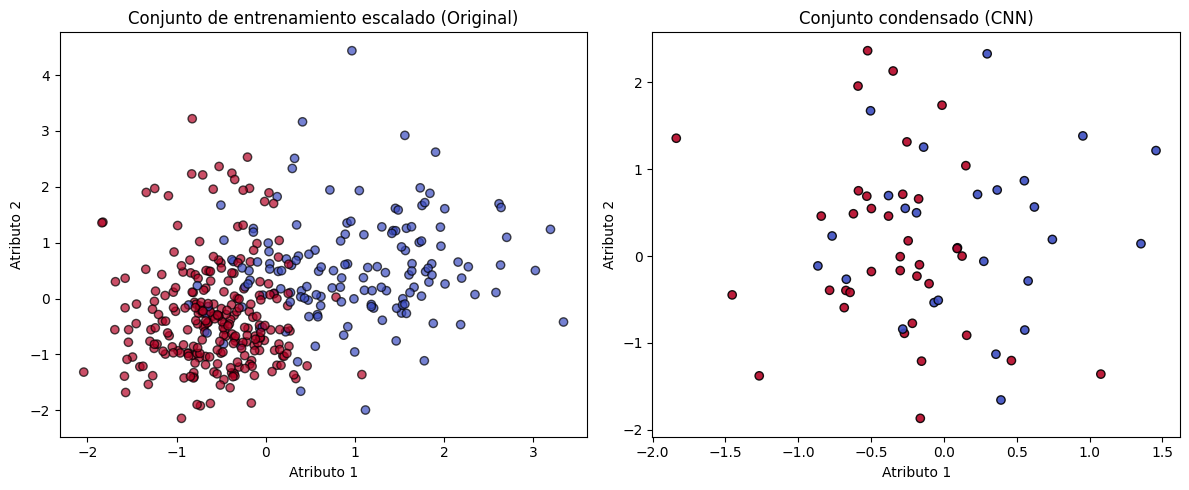

Resultados de la técica CNN sobre el conjunto de Entrenamiento
Puntos originales (entrenamiento):  398
Puntos tras CNN:                    63
Reducción:                          84.17%


In [90]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Técnica CNN (Condensed Nearest Neighbor): </h3>"))
print('\n')

# Aplicar CNN
cnn = CNN(n_neighbors=1)
X_train_cnn, y_train_cnn = cnn.select_data(X_train_scaled, y_train.to_numpy())

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Plot the original scaled training data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Conjunto de entrenamiento escalado (Original)")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.subplot(1, 2, 2)
# Plot the CNN reduced data
plt.scatter(X_train_cnn[:, 0], X_train_cnn[:, 1], c=y_train_cnn, cmap='coolwarm', edgecolor='k', alpha=0.9)
plt.title("Conjunto condensado (CNN)")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.tight_layout()
plt.show()

print("Resultados de la técica CNN sobre el conjunto de Entrenamiento")
print(f"Puntos originales (entrenamiento):  {len(y_train)}")
print(f"Puntos tras CNN:                    {len(y_train_cnn)}")
print(f"Reducción:                          {100 * cnn.reduction_:.2f}%")

 --------------------------------------------------------------------------

## 5. Aplicar técnica ENN (Edited Nearest Neighbor)

- Aplicar ENN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido

In [83]:
# 5. Aplicar técnica ENN (Edited Nearest Neighbor)

from sklearn.utils.validation import check_X_y
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import random

class ENN:
    """
    Edited Nearest Neighbor (ENN) - Edición de Wilson

    El algoritmo elimina instancias cuyo label no coincide
    con la mayoría de sus vecinos más cercanos (k-NN).
    """

    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def fit(self, X, y):
        # Validación inicial
        X, y = check_X_y(X, y, accept_sparse=False)

        mask = np.ones(len(y), dtype=bool)     # qué instancias se conservan
        tmp_m = np.ones(len(y), dtype=bool)    # máscara temporal

        indices = list(range(len(y)))
        random.shuffle(indices)

        for i in indices:
            # Excluimos temporalmente la instancia i
            tmp_m[i] = False

            # Entrenamos k-NN con el resto
            self.classifier.fit(X[tmp_m], y[tmp_m])

            # Clasificamos la instancia i
            x_i = X[i].reshape(1, -1)
            y_pred = self.classifier.predict(x_i)

            # Si el modelo NO coincide con la etiqueta real, marcamos para eliminar
            if y_pred[0] != y[i]:
                mask[i] = False

            # Restauramos la instancia i en la máscara temporal
            tmp_m[i] = True

        # Guardamos el subconjunto limpio
        self.X_ = X[mask]
        self.y_ = y[mask]
        self.sample_indices_ = np.where(mask)[0]
        self.reduction_ = 1 - len(self.y_) / len(y)
        return self



Resultados de la técica ENN sobre el conjunto de Entrenamiento
Puntos originales (entrenamiento): 398
Puntos tras ENN:                   385
Reducción:                         3.27%




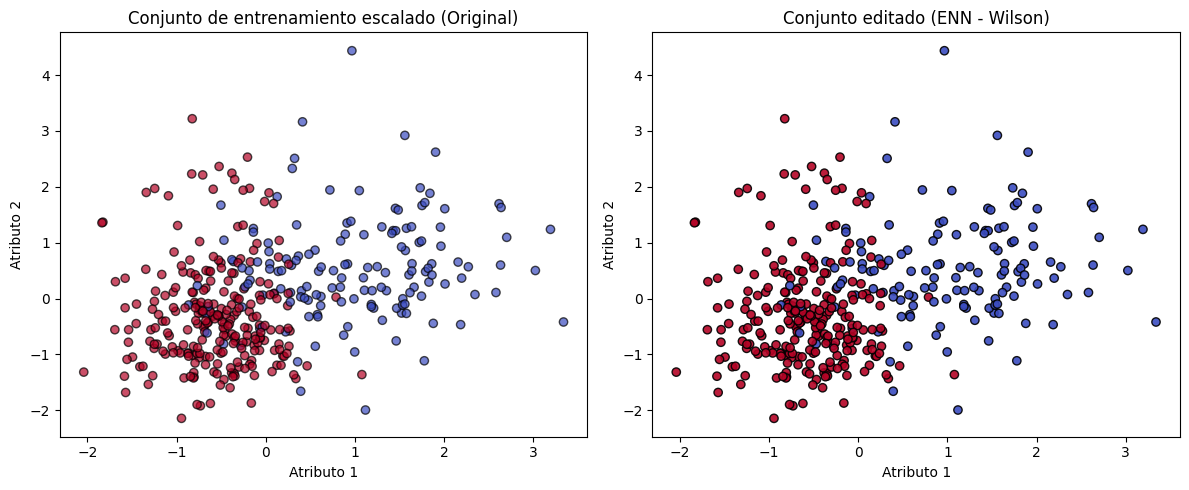

In [93]:
from sklearn.datasets import make_classification
display(HTML("<h3 style='color:blue; font-size:18px;'> Técnica ENN (Edited Nearest Neighbor): </h3>"))
print('\n')

# Aplicar ENN
selector = ENN(n_neighbors=5)
selector.fit(X_train_scaled, y_train.to_numpy())

# Seleccionar subconjunto
idx_enn = selector.sample_indices_
X_train_enn = X_train_scaled[idx_enn]
y_train_enn = y_train.to_numpy()[idx_enn]

print("Resultados de la técica ENN sobre el conjunto de Entrenamiento")
print(f"Puntos originales (entrenamiento): {len(y_train)}")
print(f"Puntos tras ENN:                   {len(y_train_enn)}")
print(f"Reducción:                         {selector.reduction_ * 100:.2f}%")
print('\n')

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
            c=y_train, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Conjunto de entrenamiento escalado (Original)")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.subplot(1, 2, 2)
plt.scatter(X_train_enn[:, 0], X_train_enn[:, 1],
            c=y_train_enn, cmap='coolwarm', edgecolor='k', alpha=0.9)
plt.title("Conjunto editado (ENN - Wilson)")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.tight_layout()
plt.show()


# --------------------------------------------------------------------------

## 6. Aplicar reducción mediante K-medias
- Realizar agrupamiento por clase y representar cada grupo con su centroide. Elige la mitad de los elementos de cada clase como el valor del número de centroides
- Generar un nuevo conjunto reducido con los centroides como prototipos



Número de centroides por clase:
  Clase 0: 148 muestras -> 74 centroides
  Clase 1: 250 muestras -> 125 centroides

 Resumen de la reducción por K-medias
Puntos originales (entrenamiento):      398
Prototipos (centroides) tras K-medias:  199
Reducción:                              50.00%




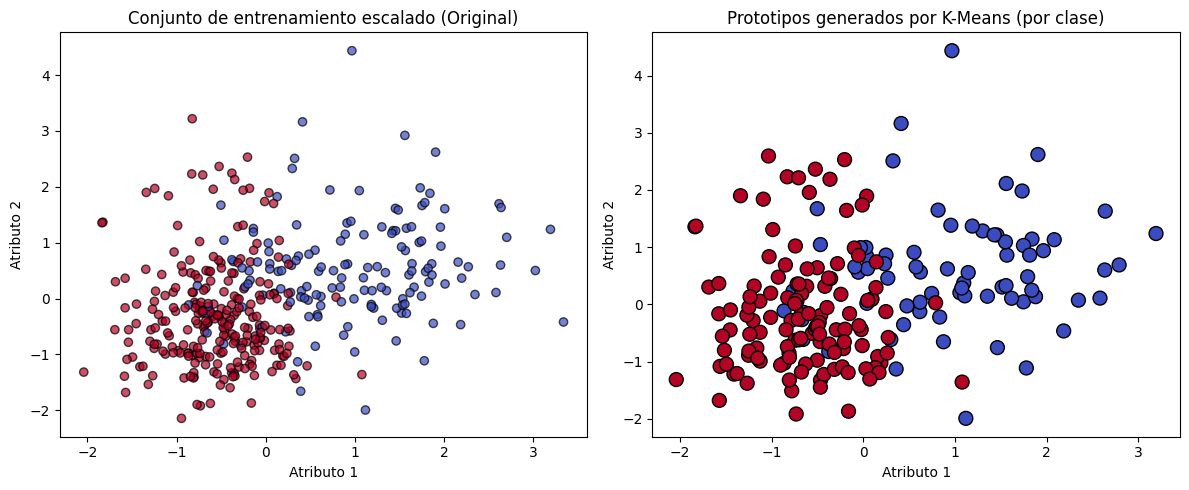

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

display(HTML("<h3 style='color:blue; font-size:18px;'> Técnica K-Means: </h3>"))
print('\n')


# 6. Aplicar reducción mediante K-medias

# 2. Escalar los datos para mejor desempeño de KMeans
# Usamos el conjunto de ENTRENAMIENTO ya escalado
# X_train_scaled  -> características escaladas
# y_train         -> etiquetas originales (Series)

y_train_np = y_train.to_numpy()
classes = np.unique(y_train_np)

# 4. Aplicar KMeans por clase
prototypes = []
labels = []

print("Número de centroides por clase:")

for c in classes:
    # Subconjunto de la clase actual
    class_data = X_train_scaled[y_train_np == c]
    n_c = class_data.shape[0]
    n_centroids = max(1, n_c // 2)

    print(f"  Clase {c}: {n_c} muestras -> {n_centroids} centroides")

    # KMeans sobre los datos de la clase
    kmeans = KMeans(n_clusters=n_centroids, random_state=42)
    kmeans.fit(class_data)

    # Guardar prototipos y sus etiquetas
    prototypes.append(kmeans.cluster_centers_)
    labels.extend([c] * n_centroids)

# 5. Concatenar resultados
X_train_kmeans = np.vstack(prototypes)
y_train_kmeans = np.array(labels)

print("\n Resumen de la reducción por K-medias")
print(f"Puntos originales (entrenamiento):      {len(y_train_np)}")
print(f"Prototipos (centroides) tras K-medias:  {len(y_train_kmeans)}")
print(f"Reducción:                              {(1 - len(y_train_kmeans)/len(y_train_np)) * 100:.2f}%")
print('\n')

# 6. Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Conjunto original
axes[0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=y_train_np, cmap='coolwarm', edgecolor='k', alpha=0.7)
axes[0].set_title("Conjunto de entrenamiento escalado (Original)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")

# Prototipos generados
axes[1].scatter(X_train_kmeans[:, 0], X_train_kmeans[:, 1],
                c=y_train_kmeans, cmap='coolwarm', edgecolor='k', s=100)
axes[1].set_title("Prototipos generados por K-Means (por clase)")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")

plt.tight_layout()
plt.show()


##7. Entrenar SVM sobre cada conjunto reducido
- Entrenar un modelo SVM (SVC) sobre:
 * los datos originales
 * datos reducidos con CNN
 * datos reducidos con ENN
 * datos reducidos con K-medias
- Evaluar cada modelo con accuracy, F1-score



Resultados de SVM sobre datos originales (sin reducción de numerosidad)
Accuracy:  0.9766
F1-score:  0.9813

Reporte de clasificación:

              precision    recall  f1-score   support

   malignant      0.969     0.969     0.969        64
      benign      0.981     0.981     0.981       107

    accuracy                          0.977       171
   macro avg      0.975     0.975     0.975       171
weighted avg      0.977     0.977     0.977       171



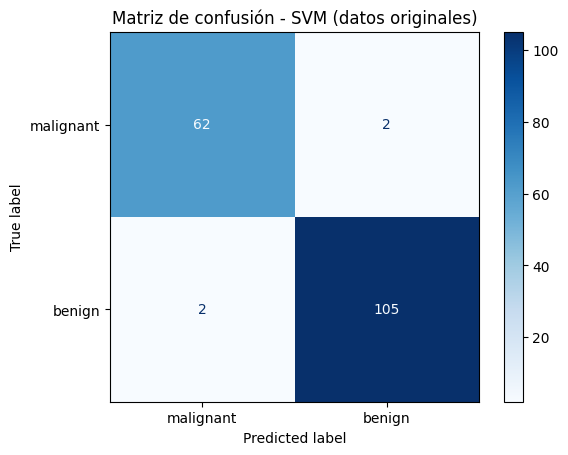

In [100]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

display(HTML("<h3 style='color:blue; font-size:18px;'> SVM sobre datos originales: </h3>"))
print('\n')

# 7. SVM sobre datos originales (X_train_scaled, y_train)

# Definir el modelo SVM
svm_original = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

# Entrenar el modelo con el conjunto de entrenamiento escalado
svm_original.fit(X_train_scaled, y_train)

# Predicciones sobre el conjunto de prueba
y_pred_original = svm_original.predict(X_test_scaled)

accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original, average='binary')  # binario: 0/1

print("Resultados de SVM sobre datos originales (sin reducción de numerosidad)")
print(f"Accuracy:  {accuracy_original:.4f}")
print(f"F1-score:  {f1_original:.4f}")

print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_original, target_names=target_names, digits=3))

cm = confusion_matrix(y_test, y_pred_original)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de confusión - SVM (datos originales)")
plt.show()




Resultados de SVM sobre datos reducidos con CNN
Accuracy:  0.9825
F1-score:  0.9859

Reporte de clasificación:

              precision    recall  f1-score   support

   malignant      0.969     0.984     0.977        64
      benign      0.991     0.981     0.986       107

    accuracy                          0.982       171
   macro avg      0.980     0.983     0.981       171
weighted avg      0.983     0.982     0.982       171



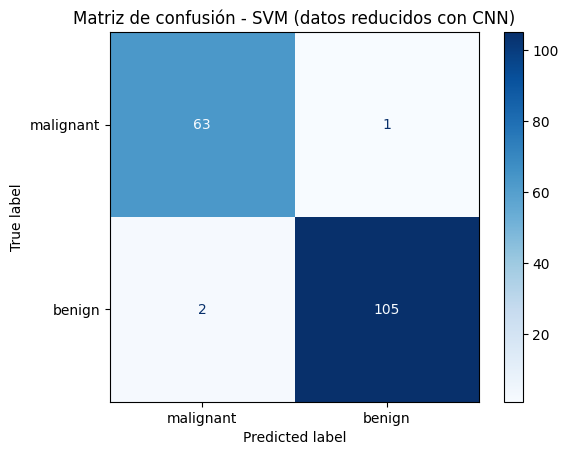

In [103]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

display(HTML("<h3 style='color:blue; font-size:18px;'> SVM sobre datos reducidos con CNN: </h3>"))
print('\n')

# 7. SVM sobre datos reducidos con CNN (X_train_cnn, y_train_cnn)

# Definir el modelo SVM
svm_cnn = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

# Entrenar el modelo con el conjunto de entrenamiento reducido por CNN
svm_cnn.fit(X_train_cnn, y_train_cnn)

# Predicciones sobre el conjunto de prueba
y_pred_cnn = svm_cnn.predict(X_test_scaled)


accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn, average='binary')  # problema binario (0/1)

print("Resultados de SVM sobre datos reducidos con CNN")
print(f"Accuracy:  {accuracy_cnn:.4f}")
print(f"F1-score:  {f1_cnn:.4f}")

print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_cnn, target_names=target_names, digits=3))


cm_cnn = confusion_matrix(y_test, y_pred_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=target_names)
disp_cnn.plot(cmap='Blues')
plt.title("Matriz de confusión - SVM (datos reducidos con CNN)")
plt.show()




Resultados de SVM sobre datos reducidos con ENN
Accuracy:  0.9591
F1-score:  0.9677

Reporte de clasificación:

              precision    recall  f1-score   support

   malignant      0.967     0.922     0.944        64
      benign      0.955     0.981     0.968       107

    accuracy                          0.959       171
   macro avg      0.961     0.952     0.956       171
weighted avg      0.959     0.959     0.959       171



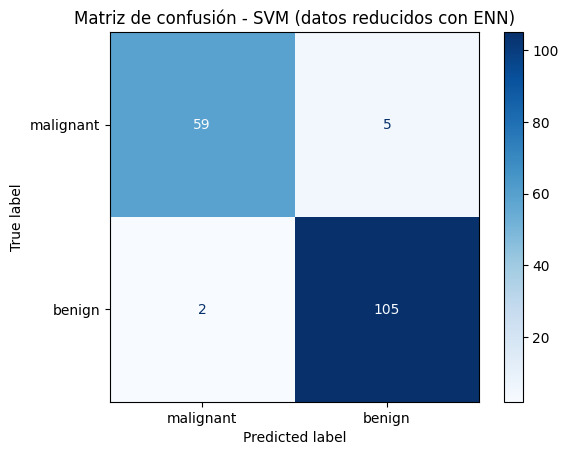

In [105]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

display(HTML("<h3 style='color:blue; font-size:18px;'> SVM sobre datos reducidos con ENN: </h3>"))
print('\n')

# 7. SVM sobre datos reducidos con ENN (X_train_enn, y_train_enn)

# Definir el modelo SVM
svm_enn = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

# Entrenar el modelo con el conjunto de entrenamiento reducido por ENN
svm_enn.fit(X_train_enn, y_train_enn)

# Predicciones sobre el conjunto de prueba (mismas características escaladas)
y_pred_enn = svm_enn.predict(X_test_scaled)

accuracy_enn = accuracy_score(y_test, y_pred_enn)
f1_enn = f1_score(y_test, y_pred_enn, average='binary')  # problema binario (0/1)

print("Resultados de SVM sobre datos reducidos con ENN")
print(f"Accuracy:  {accuracy_enn:.4f}")
print(f"F1-score:  {f1_enn:.4f}")

print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_enn, target_names=target_names, digits=3))

cm_enn = confusion_matrix(y_test, y_pred_enn)
disp_enn = ConfusionMatrixDisplay(confusion_matrix=cm_enn, display_labels=target_names)
disp_enn.plot(cmap='Blues')
plt.title("Matriz de confusión - SVM (datos reducidos con ENN)")
plt.show()




Resultados de SVM sobre datos reducidos con K-medias
Accuracy:  0.9766
F1-score:  0.9817

Reporte de clasificación:

              precision    recall  f1-score   support

   malignant      1.000     0.938     0.968        64
      benign      0.964     1.000     0.982       107

    accuracy                          0.977       171
   macro avg      0.982     0.969     0.975       171
weighted avg      0.977     0.977     0.976       171



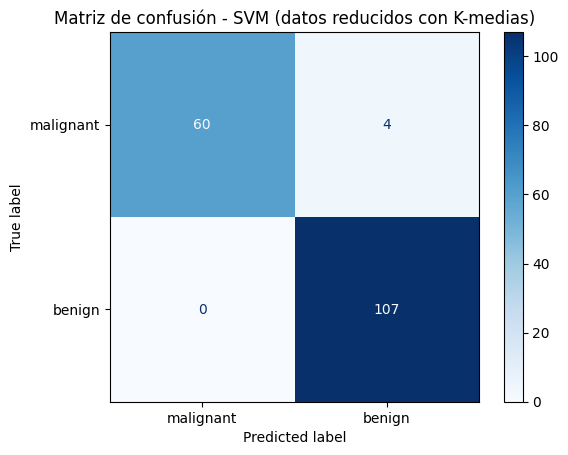

In [106]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

display(HTML("<h3 style='color:blue; font-size:18px;'> SVM sobre datos reducidos con K-medias: </h3>"))
print('\n')

# 7. SVM sobre datos reducidos con K-medias (X_train_kmeans, y_train_kmeans)

# Definir el modelo SVM
svm_kmeans = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

# Entrenar el modelo con el conjunto reducido (centroides como prototipos)
svm_kmeans.fit(X_train_kmeans, y_train_kmeans)

# Predicciones sobre el conjunto de prueba (mismas características escaladas)
y_pred_kmeans = svm_kmeans.predict(X_test_scaled)


accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
f1_kmeans = f1_score(y_test, y_pred_kmeans, average='binary')  # problema binario (0/1)

print("Resultados de SVM sobre datos reducidos con K-medias")
print(f"Accuracy:  {accuracy_kmeans:.4f}")
print(f"F1-score:  {f1_kmeans:.4f}")

print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_kmeans, target_names=target_names, digits=3))


cm_kmeans = confusion_matrix(y_test, y_pred_kmeans)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans, display_labels=target_names)
disp_kmeans.plot(cmap='Blues')
plt.title("Matriz de confusión - SVM (datos reducidos con K-medias)")
plt.show()


# --------------------------------------------------------------------------

## 📊 8. Comparar los resultados y reflexión final
- Comparar las métricas de rendimiento obtenidas con cada técnica
- Escribe tus conclusiones sobre el impacto de la reducción de la numerosidad
- ¿Cuál técnica funcionó mejor? ¿Qué ventajas y desventajas observaste?

In [110]:
import pandas as pd
from IPython.display import display, HTML

display(HTML("<h3 style='color:blue; font-size:18px;'> Comparación de las métricas de rendimiento obtenidas con cada técnica (Accuracy y F1-score) </h3>"))
print('\n')

# 8. Comparar resultados de las distintas técnicas

resultados = pd.DataFrame({
    "Accuracy": [
        accuracy_original,
        accuracy_cnn,
        accuracy_enn,
        accuracy_kmeans
    ],
    "F1-score": [
        f1_original,
        f1_cnn,
        f1_enn,
        f1_kmeans
    ]
}, index=[
    "SVM - Datos originales",
    "SVM - CNN",
    "SVM - ENN",
    "SVM - K-medias"
])


display(resultados.style.format("{:.4f}"))


,Accuracy,F1-score
SVM - Datos originales,0.9766,0.9813
SVM - CNN,0.9825,0.9859
SVM - ENN,0.9591,0.9677
SVM - K-medias,0.9766,0.9817


**Conclusiones sobre el impacto de la reducción de la numerosidad:**

Considerando el tamaño del conjunto de entrenamiento, las tres técnicas de reducción de la numerosidad permiten disminuir de manera eficiente el número de puntos o instancias empleadas para entrenar el modelo SVM. En el caso de la técnica CNN conserva únicamente una fracción de los ejemplos originales, priorizando aquellas instancias que resultan más representativas bajo la regla de clasificación 1-NN. Por lo tanto, el conjunto reducido mantiene los patrones esenciales del problema. Por otra parte, la técnica ENN trabaja como un filtro depurador al eliminar puntos que no son consistentes con sus vecinos más cercanos, lo anterior contribuye a reducir el ruido presente en los datos y a suavizar la frontera de decisión. Finalmente, la técnica de K-medias agrupa los ejemplos de cada clase y reemplaza dichos grupos por sus centroides, generando prototipos que sintetizan el comportamiento general de cada categoría.

**¿Cuál técnica funcionó mejor?**

La técnica de reducción basada en CNN fue la que mostró el mejor desempeño, en donde alcanzo la mayor accuracy (0.9825) y el mayor F1-score (0.9859), superando ligeramente al modelo entrenado con los datos originales como al modelo reducido mediante K-medias, cuyos resultados fueron prácticamente equivalentes entre sí. Por el contrario, ENN presentó el rendimiento más bajo, con una accuracy de 0.9591 y un F1-score de 0.9677, esos resultados sugieren que el proceso de edición eliminó instancias relevantes o generó una frontera de decisión muy fuerte para este conjunto de datos. En conjunto, los resultados indican que, aunque K-medias logra mantener un desempeño similar al modelo completo, sin embargo CNN se posiciona como la técnica más efectiva al combinar reducción de datos con una mejora ligera en la capacidad predictiva del SVM.


**¿Qué ventajas y desventajas observaste?**

En términos generales, cada técnica de reducción de numerosidad presentó fortalezas y limitaciones particulares. Por ejemplo, CNN mostró como principal ventaja su capacidad para conservar únicamente los puntos más representativos, eso permitió reducir el conjunto de entrenamiento sin perder desempeño; sin embargo, una de sus desventajas es que puede mantener ruido o instancias frontera difíciles si resultan necesarias para la clasificación 1-NN. Por otra parte, la técnica ENN puede destacar por su capacidad para eliminar ruido y suavizar la frontera de decisión, pero una desventaja de esta técnica es que puede eliminar de forma excesiva los ejemplos relevantes, lo que reduce la representatividad del conjunto de datos y deteriora las métricas de desempeño. Finalmente, K-medias ofrece como ventaja una reducción clara del conjunto mediante prototipos que resumen el comportamiento de cada clase, lo que facilita el entrenamiento y disminuye el costo computacional. Sin embargo, su principal problema es que los centroides no corresponden a instancias reales del dataset y, si el número de clusters es muy reducido, pueden perderse detalles importantes de la estructura original de las clases.

